# Week 10 Problem Set

## Homeworks

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**HW0.** Do the following before starting the homework questions.

**Task 1.** Paste the following functions from your cohort sessions:
- `get_features_target()`
- `normalize_z()`
- `normalize_minmax()`
- `replace_target()`
- `split_data()`
- `prepare_feature()`
- `prepare_target()`
- `log_regression()`
- `compute_cost_logreg()`
- `gradient_descent_logreg()`
- `predict_norm()`
- `predict()`
- `confusion_matrix()`

In [4]:
def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:, feature_names]
    df_target = df.loc[:, target_names]
    return df_feature, df_target

def normalize_z(df):
    dfout = ((df - df.mean(axis = 0))/df.std(axis = 0))
    return dfout

def normalize_minmax(dfin):
    df.copy()
    dfout = (dfin - dfin.min(axis = 0))/(dfin.max(axis = 0) - dfin.min(axis = 0))
    return dfout

def prepare_feature(df_feature):
    feature = df_feature.to_numpy()
    array1 = np.ones((feature.shape[0], 1)) # concatenate the matrix
    X = np.concatenate((array1, feature), axis = 1) # concatenates along the axis 1 aka to have 2 columns in a matrix
    return X

def prepare_target(df_target):
    return df_target.to_numpy()

def replace_target(df_target, target_name, map_vals):
    df_out = df_target.copy()
    df_out.loc[:, target_name] = df_target[target_name].apply(lambda val: map_vals[val])
    return df_out

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indices = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    # k is the number of rows in the test set
    num_rows = len(indices)
    k = int(test_size * num_rows) # num of rows in the test case
    test_indices = np.random.choice(indices, size = k , replace = False)
    indices = set(indices) # randomized order of elements - in this case they are indices
    test_indices = set(test_indices)
    train_indices = indices - test_indices
    df_feature_train = df_feature.loc[train_indices, :]
    df_feature_test = df_feature.loc[test_indices, :]
    df_target_train = df_target.loc[train_indices, :]
    df_target_test = df_target.loc[test_indices, :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test

def log_regression(beta, X):
    z = np.matmul(X, beta)
    return 1 / (1 + np.exp(-z))
    

def compute_cost_logreg(beta, X, y):
    np.seterr(divide = 'ignore') 
    p = log_regression(beta, X)
    m = X.shape[0]
    J = (-1/m) * np.sum(np.where(y == 1, np.log(p), np.log(1-p)))
    np.seterr(divide = 'warn')
    return J

def gradient_descent_logreg(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros(num_iters)
    for n in range(num_iters):
        p = log_regression(beta, X)
        error = p - y
        delta = np.matmul(X.T, error)
        beta = beta - (alpha / m) * delta
        J_storage[n] = compute_cost_logreg(beta, X, y)
    return beta, J_storage

def predict_norm(X, beta):
    p = log_regression(beta, X)
    return np.where(p >= 0.5, 1, 0)

def predict(df_feature, beta):
    feature_z = normalize_z(df_feature)
    X = prepare_feature(feature_z)
    return predict_norm(X, beta)
  
import itertools
def confusion_matrix(ytrue, ypred, labels):
    output = {}
    keys = itertools.product(labels, repeat=2)
    for k in keys:
        output[k] = 0
    #print(ytrue.shape)
    #print(output)
    for idx in range(ytrue.shape[0]):
        actual = ytrue[idx, 0] # ytrue[idx][0]
        pred = ypred[idx, 0]
        output[(actual, pred)] += 1
        #print(actual, pred, output[(actual, pred)])
    
    return output

def gradient_descent(X, y, beta, alpha, num_iters):
    # calculate m from the shape of X or y
    m = X.shape[0] # number of rows
    J_storage = np.zeros(num_iters)
    
    # for the number of iterations
    for n in range(num_iters):
        # -> compute the predicted y
        yp = np.matmul(X, beta)
        
        # -> compute the error
        error = yp - y
        # -> compute the new beta
        beta = beta - (alpha / m) * np.matmul(X.T, error) # transpose matrix
        # -> compute J using the new beta and store it
        J_storage[n] = compute_cost(X, y, beta)
        
    return beta, J_storage

**Task 2.** Load the Iris data set from `iris_data.csv` into a Data Frame. 

    

In [5]:
# read iris_data.csv
df = pd.read_csv("iris_data.csv")

###
### YOUR CODE HERE
###
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Task 3.** Do the following tasks.

- Read the following columns for the features: `'sepal_length', 'sepal_width', 'petal_length', 'petal_width'`.
- Read the column `species` for the target.
- Replace the `species` column with the following mapping:
    - `Iris-setosa`: `0`
    - `Iris-versicolor`: `1`
    - `Iris-virginica`: `2`

In [6]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

# extract the features and the target

df_features, df_target = get_features_targets(df, columns, ["species"])
print(df_target)
print(df_features)


# # replace the target using the mapping
df_target = replace_target(df_target, "species" , mapping)

# print(df_target["species"])
      


# result = np.unique(df_target['species'], return_counts=True)
# print(result)
# assert (result[0] == [0, 1, 2]).all()
# assert (result[1] == [50, 50, 50]).all()
### YOUR CODE HEREdf,["RM"], ["MEDV"])
###


            species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [7]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

# extract the features and the target

df_features, df_target = get_features_targets(df, columns, ["species"])
print(df_target)
print(df_features)


# # replace the target using the mapping
df_target=replace_target(df_target, "species" , mapping)

type(df_target)

            species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


pandas.core.frame.DataFrame

In [8]:
result = np.unique(df_target['species'], return_counts=True)
assert (result[0] == [0, 1, 2]).all()
assert (result[1] == [50, 50, 50]).all()

In [9]:
df_target
df_target['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

**HW1.** *One-vs-All target:* Write a function that takes in a target data frame and returns a new dataframe where the size of the column is the same as the number of category. The function makes use of `replace_target()` function to create one-vs-all target values. 

For example, if we have three categories of class, the columns of the returned data frame will be as follows:
- column target: this is the original target column
- column 0: the target with values of 0 will be set to 1 while the rest will be replaced with 0.
- column 1: the target with values of 1 will be set to 1 while the rest will be replaced with 0.
- column 2: the target with values of 2 will be set to 1 while while the rest will be replaced with 0.

In [10]:
# i = [0,1,2]
# for i in len(range(i)):
#     print

In [11]:
# mapping= {'cat' : 1 , 'dog' : 0}
# col = 'species'
# uniquevals = np.unique(df_target[col])
# print(uniquevals)
# print(len(uniquevals))

#     mapping = {'column 0': 0, 'column 1' : 1, 'column 2' : 2}
#     df_target=replace_target(df_target, "species" , mapping)

#     print(col)
#     print(col.shape)
def create_onevsall_columns(df_target, col):
    dfout = df_target.copy()
    print("dfout",dfout)
    uniquevals = np.unique(df_target[col])
    print(uniquevals)

    for i in range(len(uniquevals)):
        dfout[i] = dfout.loc[:,col].apply(lambda values: 1 if values == i else 0)
        #dfout.loc doesnt work
    return dfout


# def create_onevsall_columns(df_target, col):
#     dfout = df_target.copy()
#     dfout[0] = replace_target(df_target, col, {0: 1, 1: 0, 2: 0})
#     dfout[1] = replace_target(df_target, col, {0: 0, 1: 1, 2: 0})
#     dfout[2] = replace_target(df_target, col, {0: 0, 1: 0, 2: 1})

# return dfout

###
### YOUR CODE HERE
###


In [12]:
df_targets = create_onevsall_columns(df_target, 'species')
print(df_targets)
result = np.unique(df_targets['species'], return_counts=True)
assert (result[0] == [0, 1, 2]).all()
assert (result[1] == [50, 50, 50]).all()
result = np.unique(df_targets[0], return_counts=True)
assert (result[0] == [0, 1]).all()
assert (result[1] == [100, 50]).all()
result = np.unique(df_targets[1], return_counts=True)
assert (result[0] == [0, 1]).all()
assert (result[1] == [100, 50]).all()
result = np.unique(df_targets[2], return_counts=True)
assert (result[0] == [0, 1]).all()
assert (result[1] == [100, 50]).all()

dfout      species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]
[0 1 2]
     species  0  1  2
0          0  1  0  0
1          0  1  0  0
2          0  1  0  0
3          0  1  0  0
4          0  1  0  0
..       ... .. .. ..
145        2  0  0  1
146        2  0  0  1
147        2  0  0  1
148        2  0  0  1
149        2  0  0  1

[150 rows x 4 columns]


**HW2.** *Multiple features and splitting of data set:* Do the following task in the code below:
- Read the following columns for the features: `sepal_length`,`sepal_width`, `petal_length`, `petal_width` normalize it using `normalize_z()`. 
- Read `species` as the target column and use `create_onevsall_columns()` to create the additional target columns to do multi class classification.
- Split the data set with 30% test size and `random_state = 100`.
- Normalize the training feature data set using `normalize_z()` function.
- Convert to numpy array both the target and the features using `prepare_feature()` and `prepare_target()` functions.
- Call `gradient_descent()` function to get the parameters using the training data set.

In [13]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

# extract the features and the target
df_features, df_target = get_features_targets(df, columns, ["species"])

# change target values to integer using mapping
df_target = replace_target(df_target, "species", mapping)

# create one vs all columns for the target
df_targets = create_onevsall_columns(df_target, "species")

# split the data using random_state = 100 and 30% test size
df_features_train, df_features_test, df_targets_train, df_targets_test = split_data(df_features, df_targets, random_state = 100, test_size = 0.3)

# normalize the training feature
df_features_train_z = normalize_z(df_features_train)

dfout      species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]
[0 1 2]


In [14]:
assert df_features_train_z.shape == (105, 4)

assert np.isclose(df_features_train_z.min(), -2.52349).any()
assert np.isclose(df_features_train_z.max(), 2.73284).any()
assert np.isclose(df_features_train_z['sepal_width'].mean(), 0)
assert np.isclose(df_features_train_z['sepal_width'].std(), 1, atol=0.01)

assert (np.unique(df_targets_train['species']) == [0, 1, 2]).all()
assert (np.unique(df_targets_train[0]) == [0, 1]).all()
assert (np.unique(df_targets_train[1]) == [0, 1]).all()
assert (np.unique(df_targets_train[2]) == [0, 1]).all()


**HW3.** *Build Multi-class Model:* Write a function `build_model_multiclass()` which takes in the following arguments:
- `df_features`: which is a Pandas data framecontaining the features.
- `df_targets`: which is a Pandas data frame containing the target for one vs all classification. 
- `col_target`: the name of the column target in the original data frame which is also the key of the dictionary containing the original target numpy array.
- `iterations`: the number of iterations to perform the gradient descent. By default it is set to 1500.
- `alpha`: the learning rate in the gradient descent algorithm. By default it is set to 0.01.

The function should return a dictionary of dictionary. The output dictionary has the following key and values:
- key: the keys are the categories or the labels in the target.
- values: the values are another dictionary for that particular label. This dictionary has two keys: `beta` and `J_storage`, which gives the parameter value for that particular label and its cost minimization values at every iteration.

Hint:
- you need to call `prepare_feature()` and `prepare_target()` to change the Pandas data frame to Numpy arrays.
- in order to create a data frame instead of a series when accessing a column, use `df[[c]]` (will output data frame) instead of `df[c]` (will output series). 
- You need to use `normalize_minmax()` on your target before passing it on to `gradient_descent_logreg()` because the function logistic regression has the normalized value of 0 to 1 in the y axis.

In [15]:
def build_model_multiclass(df_features, df_targets, col_target, iterations=1500, alpha=0.01):
    output = {}
    X = prepare_feature(df_features)
    print(df_targets)
    for target in df_targets.loc[:, 0:2]:
        
        print(target)
#         print(df_targets)
#         print(df_targets[target])
#         print(df_targets[[target]])
        normalize = normalize_minmax(df_targets[[target]])
        #assertion error occurred when i didnt put list within a list
        y = prepare_target(normalize)
        beta = np.zeros((5,1))
        beta, J_storage = gradient_descent_logreg(X, y, beta, alpha, iterations)
        dict1 = {'beta': beta, 'J_storage': J_storage}
        output[target] = dict1
        print(output)
    return output

In [16]:
output = build_model_multiclass(df_features_train_z, df_targets_train, 'species')

assert isinstance(output, dict)
expected = np.array([[ -1.0198841], [ -0.69883077], [  1.0774116], [-1.17170999], [-1.12846826]])
assert np.isclose(output[0]['beta'], expected).all()
expected = np.array([[ -0.63304937], [ 0.11684857], [-1.15346071], [ 0.18746937], [-0.14534827 ]])
assert np.isclose(output[1]['beta'], expected).all()
expected = np.array([[-1.31740148 ], [0.42271871], [0.18526839], [ 0.8831822], [1.17929455]])
assert np.isclose(output[2]['beta'], expected).all()

     species  0  1  2
0          0  1  0  0
2          0  1  0  0
3          0  1  0  0
4          0  1  0  0
5          0  1  0  0
..       ... .. .. ..
142        2  0  0  1
143        2  0  0  1
144        2  0  0  1
147        2  0  0  1
148        2  0  0  1

[105 rows x 4 columns]
0
{0: {'beta': array([[-1.0198841 ],
       [-0.69883077],
       [ 1.0774116 ],
       [-1.17170999],
       [-1.12846826]]), 'J_storage': array([0.68739949, 0.68172973, 0.67613683, ..., 0.05490399, 0.05487285,
       0.05484174])}}
1
{0: {'beta': array([[-1.0198841 ],
       [-0.69883077],
       [ 1.0774116 ],
       [-1.17170999],
       [-1.12846826]]), 'J_storage': array([0.68739949, 0.68172973, 0.67613683, ..., 0.05490399, 0.05487285,
       0.05484174])}, 1: {'beta': array([[-0.63304937],
       [ 0.11684857],
       [-1.15346071],
       [ 0.18746937],
       [-0.14534827]]), 'J_storage': array([0.69217867, 0.69121867, 0.6902671 , ..., 0.50952092, 0.50950849,
       0.50949608])}}
2
{0: {'beta'

class model = 0 [[-1.0198841 ]
 [-0.69883077]
 [ 1.0774116 ]
 [-1.17170999]
 [-1.12846826]]
class model = 1 [[-0.63304937]
 [ 0.11684857]
 [-1.15346071]
 [ 0.18746937]
 [-0.14534827]]
class model = 2 [[-1.31740148]
 [ 0.42271871]
 [ 0.18526839]
 [ 0.8831822 ]
 [ 1.17929455]]


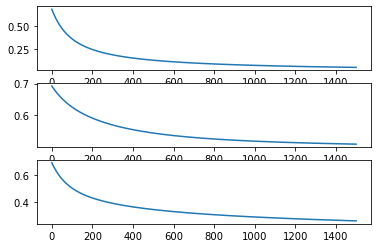

In [17]:
fig, axes = plt.subplots(len(output), 1)
idx = 0
for c in output:
    print(f'class model = {c:}', output[c]['beta'])
    axes[idx].plot(output[c]['J_storage'])
    idx += 1

**HW4.** *Predict Multi-class:* Write a function `predict_multiclass()` that takes in the data frame for the features and the parameters for the multi-class classification and return a Numpy array for the predicted target.

Recall that you need to do the following steps:
- Normalize the features and change to numpy array
- For each of the class, calculate the probability by using `log_regression()` function.
- For each record, find the class that gives the maximum probability.
- Returns a Numpy array with the predicted target values

You can use the following function in your code:
- `np.argmax()` to find the column name with the maximum value
- `df.apply(func, axis=1)`: which is to apply some function on a particular axis. Setting axis=1 means that the function is to be applied accross the columns of the data frame instead of the index or the rows. 

In [18]:
def predict_multiclass(df_features, multi_beta):
    print(multi_beta)
    normalize = normalize_z(df_features)
    X = prepare_feature(normalize)
    temp = []
    for k in multi_beta.keys():
        print("retrieving",multi_beta[k]['beta'])
        prob = log_regression(multi_beta[k]['beta'], X)
        temp.append(prob)
    temp_array = np.array(temp)
    print(temp_array)
    return np.argmax(temp_array, axis=0)

In [19]:
pred = predict_multiclass(df_features_test, output)

assert isinstance(pred, np.ndarray)
assert pred.shape == (45, 1)
assert pred.min() == 0
assert pred.max() == 2
assert np.median(pred) == 1

{0: {'beta': array([[-1.0198841 ],
       [-0.69883077],
       [ 1.0774116 ],
       [-1.17170999],
       [-1.12846826]]), 'J_storage': array([0.68739949, 0.68172973, 0.67613683, ..., 0.05490399, 0.05487285,
       0.05484174])}, 1: {'beta': array([[-0.63304937],
       [ 0.11684857],
       [-1.15346071],
       [ 0.18746937],
       [-0.14534827]]), 'J_storage': array([0.69217867, 0.69121867, 0.6902671 , ..., 0.50952092, 0.50950849,
       0.50949608])}, 2: {'beta': array([[-1.31740148],
       [ 0.42271871],
       [ 0.18526839],
       [ 0.8831822 ],
       [ 1.17929455]]), 'J_storage': array([0.68991177, 0.68671789, 0.68356495, ..., 0.26207724, 0.26203146,
       0.26198572])}}
retrieving [[-1.0198841 ]
 [-0.69883077]
 [ 1.0774116 ]
 [-1.17170999]
 [-1.12846826]]
retrieving [[-0.63304937]
 [ 0.11684857]
 [-1.15346071]
 [ 0.18746937]
 [-0.14534827]]
retrieving [[-1.31740148]
 [ 0.42271871]
 [ 0.18526839]
 [ 0.8831822 ]
 [ 1.17929455]]
[[[0.01439989]
  [0.93153909]
  [0.00453119]


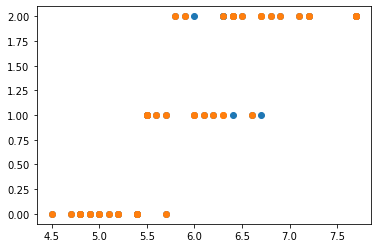

In [20]:
plt.scatter(df_features_test['sepal_length'], df_targets_test['species'])
plt.scatter(df_features_test['sepal_length'], pred)

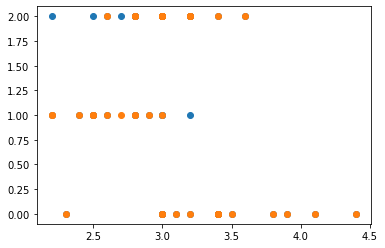

In [21]:
plt.scatter(df_features_test['sepal_width'], df_targets_test['species'])
plt.scatter(df_features_test['sepal_width'], pred)

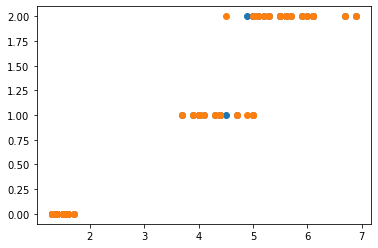

In [22]:
plt.scatter(df_features_test['petal_length'], df_targets_test['species'])
plt.scatter(df_features_test['petal_length'], pred)

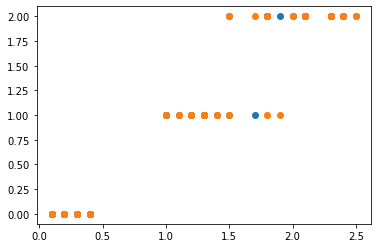

In [23]:
plt.scatter(df_features_test['petal_width'], df_targets_test['species'])
plt.scatter(df_features_test['petal_width'], pred)

**HW5.** *Confusion Matrix:* Write a function to calculate the confusion matrix for multi-class label. If you write the solution in the Cohort session properly, the solution will be the same as in the Cohort session.

Make sure that you can output a dictionary where the keys are all the combinations of all the classes: `(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)`.

In [24]:
import itertools
def confusion_matrix(ytrue, ypred, labels):
    output = {}
    key = itertools.product(labels, repeat = 2)
    for k in key:
        output[k] = 0
    print(ytrue.shape)
    for idx in range(ytrue.shape[0]):
        actual = ytrue[idx, 0] 
        pred = ypred[idx, 0]
        output[(actual, pred)] += 1
    return output

In [25]:
cm = confusion_matrix(df_targets_test.values, pred, [0, 1, 2])
print(cm)
assert cm == {(0, 0): 16, (0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 9, (1, 2): 2, (2, 0): 0, (2, 1): 3, (2, 2): 15}

(45, 4)
{(0, 0): 16, (0, 1): 0, (0, 2): 0, (1, 0): 0, (1, 1): 9, (1, 2): 2, (2, 0): 0, (2, 1): 3, (2, 2): 15}


**HW6.** *Metrics:* Write a function `calc_accuracy()` that takes in a Confusion Matrix array and output a dictionary with the following keys and values:
- `accuracy`: total number of correct predictions / total number of records
- `sensitivity`: total correct positive cases / total positive cases
- `precision`: total  of correct positive cases / total predicted positive cases

For multiple classes, we can also calculate *sensitivity* and *precision* for each of the class. For example, to calculate the sensitivity for class *i*, we use:

$$\text{sensitivity}_i = \frac{M_{ii}}{\sum_j{M_{ij}}}$$

This means that we get the value at row *i* and columnn *i* which is the total correct case for class *i* and the sum over all the columns in row *i* which is the total cases for class *i*. 

Similarly, we can calculate the precision for class *i* using:

$$\text{precision}_i = \frac{M_{ii}}{\sum_j{M_{ji}}}$$

**Notice that the indices are swapped for the denominator**. For precision, we instead of summing over all the columns, we sum over all the rows in column *i* which is the total cases when class *i* is *predicted*.

The output is a dictionary with one of the keys called `accuracy` and the rest of the keys are the label for the different classes, i.e. 0, 1, and 2 in our example here. The value for `accuracy` key is a float. On the other hand, the values for the other label keys is another dictionary that has `sensitivity` and `precision` as the keys.

In [26]:
def calc_accuracy(cm, labels):
    output = {'accuracy': 0}
    for l in labels:
        output[l] = {}
        
    output['accuracy'] = sum(cm[(i,i)] for i in labels) / sum(cm.values())
    for i in labels:
        output[i]['sensitivity'] = cm[(i,i)]/sum(cm[(i,j)] for j in labels)
        output[i]['precision'] = cm[(i,i)]/ sum(cm[(j,i)] for j in labels)
    
    return output

In [27]:
metrics = calc_accuracy(cm, [0,1,2])
print(metrics)
assert np.isclose(metrics['accuracy'], 0.88888)
assert metrics[0] == {'sensitivity': 1.0, 'precision': 1.0}
assert np.isclose(metrics[0]['sensitivity'], 1.0)
assert np.isclose(metrics[0]['precision'], 1.0)
assert np.isclose(metrics[1]['sensitivity'], 0.8181818)
assert np.isclose(metrics[1]['precision'], 0.75)
assert np.isclose(metrics[2]['sensitivity'], 0.833333)
assert np.isclose(metrics[2]['precision'], 0.88235)


{'accuracy': 0.8888888888888888, 0: {'sensitivity': 1.0, 'precision': 1.0}, 1: {'sensitivity': 0.8181818181818182, 'precision': 0.75}, 2: {'sensitivity': 0.8333333333333334, 'precision': 0.8823529411764706}}


**HW7.** *Optional:* Redo the above tasks using Scikit Learn libraries. You will need to use the following:
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

You can refer to the followign discussion on the different minimization solver for `LogisticRegression()` class.
- [Stack overflow - logistic regression python solvers' defintions](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [35]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}

# get the features and the columns
df_features = df[columns]

# replace target values with integers using the mapping
df_target = replace_target(df_target, "diagnosis", mapping)



###
### YOUR CODE HERE
###


AttributeError: 'NoneType' object has no attribute 'copy'

In [30]:
# split data set using random_state = 100 and 30% test size
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(
    df_features, df_target, random_state=100, test_size=0.3)

# change feature to numpy array and append column of 1s
feature = None

# change target to numpy array
target = prepare_target(df_target_train)

###
### YOUR CODE HERE
###


In [31]:
# create LogisticRegression object instance
# set solver to 'newton-cg' and multi_class to 'auto'
model = None

# build model
pass

# get predicted value
pred = None

###
### YOUR CODE HERE
###


In [32]:
# calculate confusion matrix
cm = None

###
### YOUR CODE HERE
###
print(cm)


None


In [33]:
expected = np.array([[16,  0,  0], [ 0, 11,  0], [ 0,  1, 17]])
assert (cm == expected).all()

AssertionError: 

In [34]:
plt.scatter(df_features_test["sepal_width"], df_target_test)
plt.scatter(df_features_test["sepal_width"], pred)

In [35]:
plt.scatter(df_features_test["sepal_length"], df_target_test)
plt.scatter(df_features_test["sepal_length"], pred)

In [36]:
plt.scatter(df_features_test["petal_width"], df_target_test)
plt.scatter(df_features_test["petal_width"], pred)

In [37]:
plt.scatter(df_features_test["petal_length"], df_target_test)
plt.scatter(df_features_test["petal_length"], pred)